# Ideal Living Polymerization
## 1. Simulation



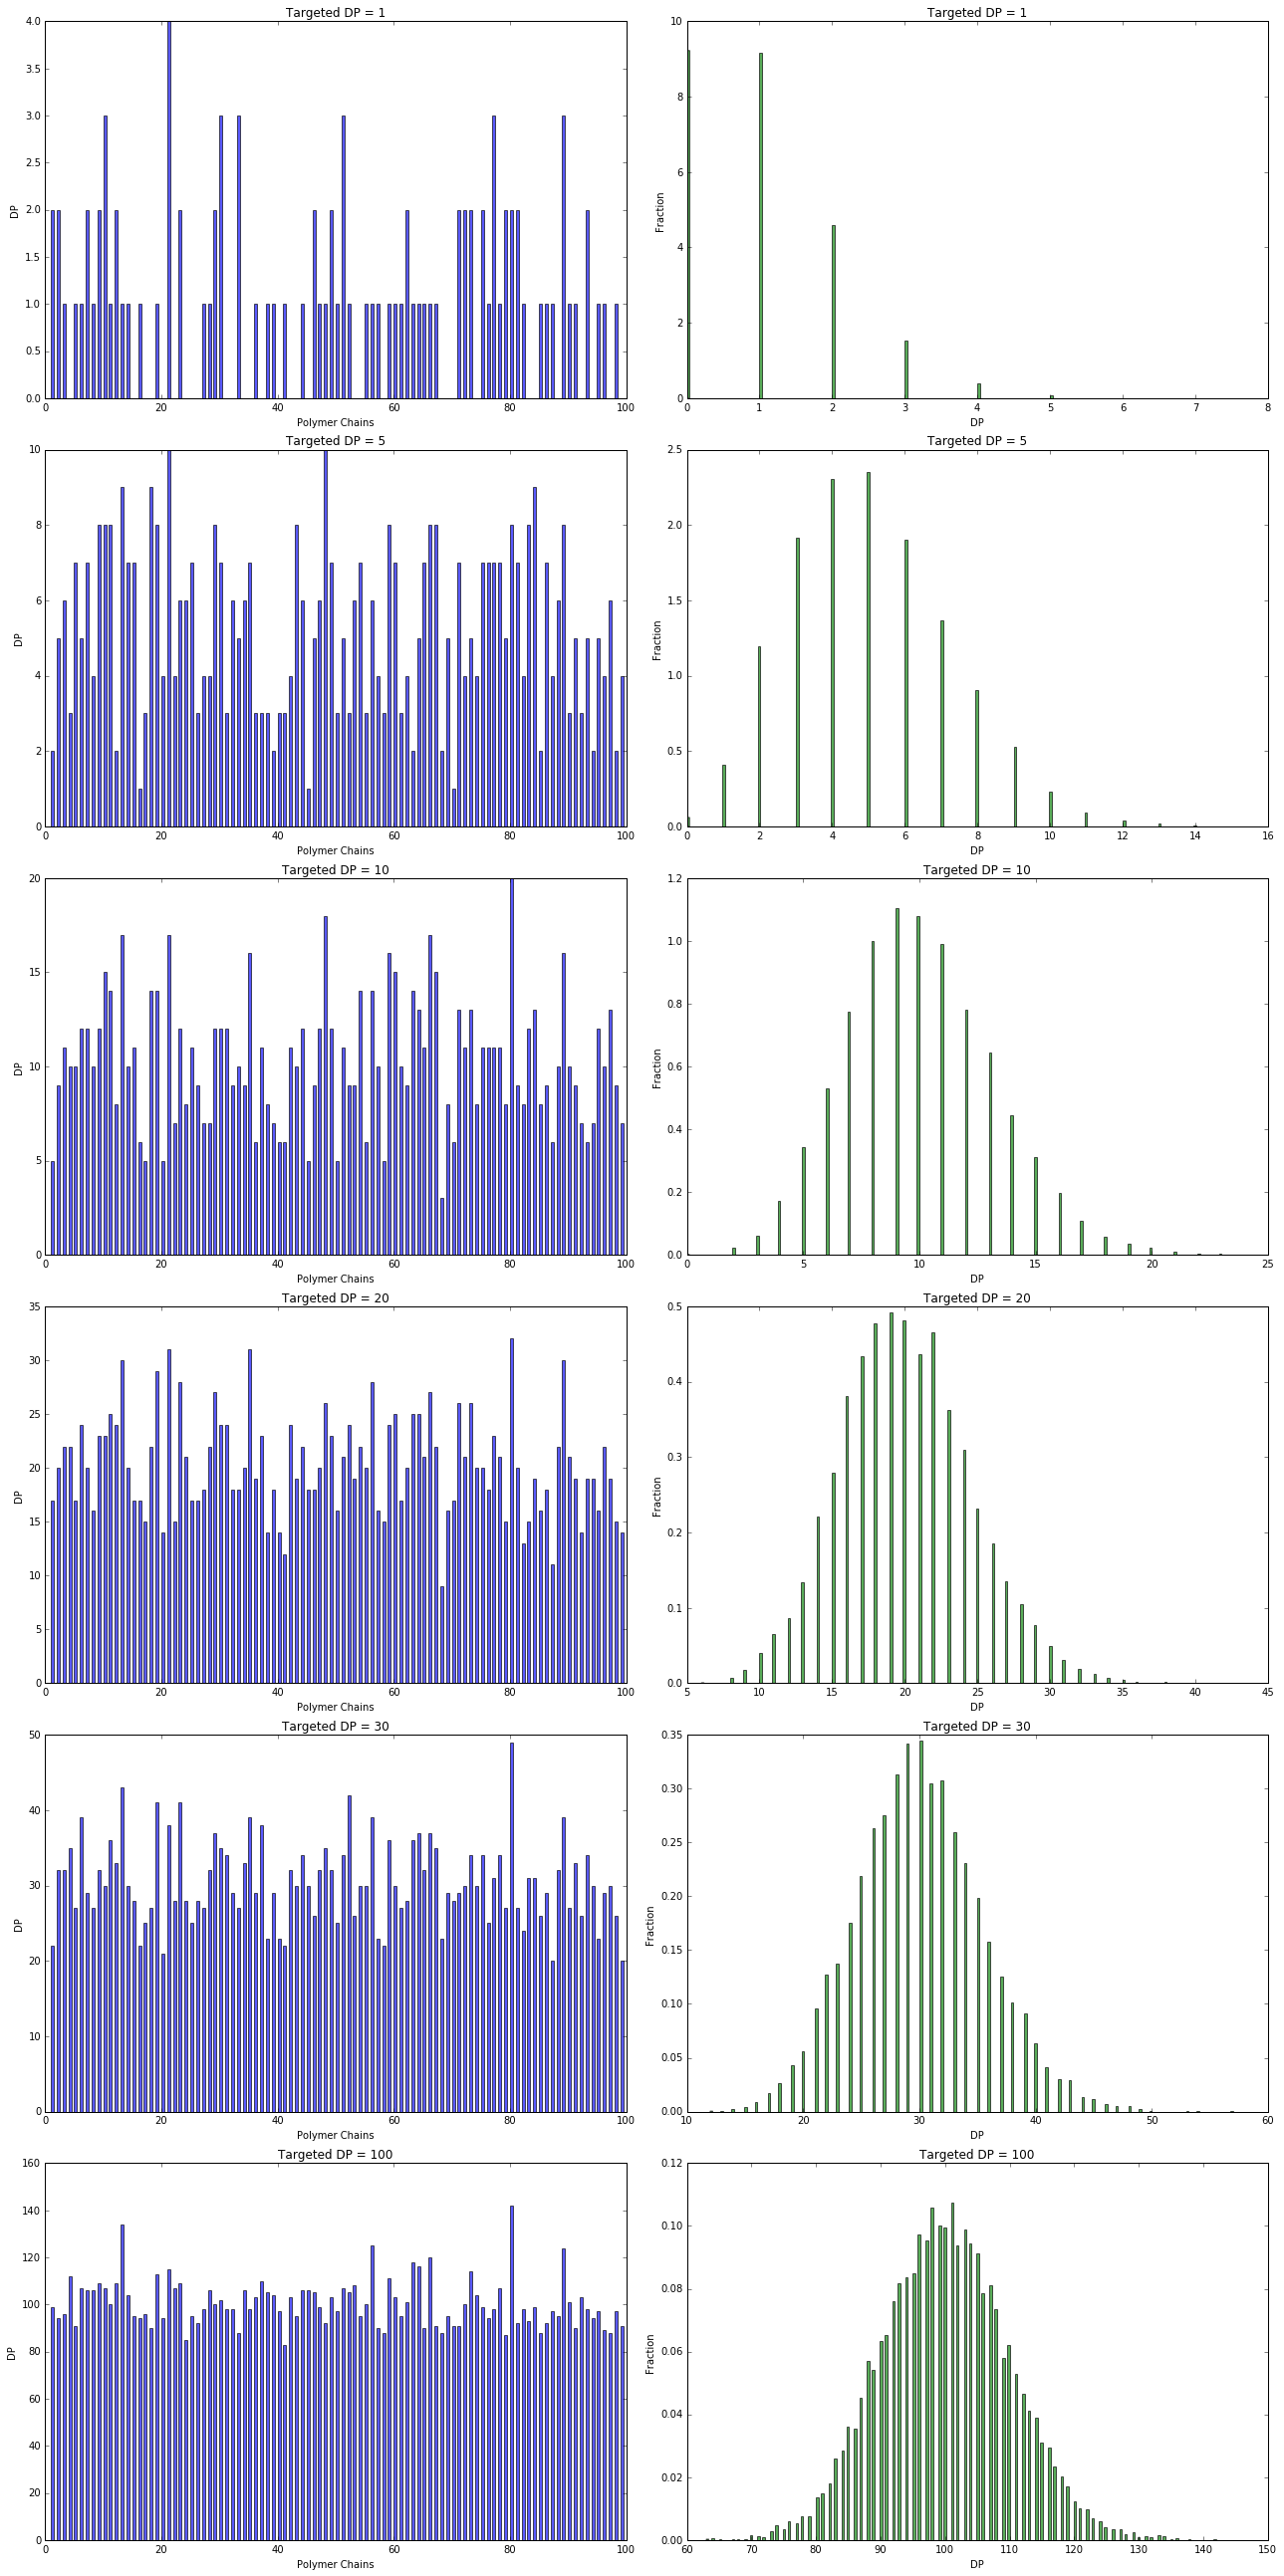

In [5]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt


NPoly = 10000  # Number of polymer chains (Feel free to change the value, but keep it > or = 100)
DP_Targ = np.array([1, 5, 10, 20, 30, 100])  # Different targeted degree of polymerization (Feel free to add or to delete numbers, or to change the values)
NMon = NPoly*DP_Targ.max()  # Number of monomers
polym = np.random.random_integers(1, NPoly, NMon)  # Each monomer goes to one polymer chain randomly

mpl.rcParams['figure.figsize'] = (18.0, 6.0*len(DP_Targ))
DP = np.zeros((len(DP_Targ), NPoly))  # Calculate the degree of polymerization of each chain
plt.subplots(len(DP_Targ), 2)
k = 0
index = np.arange(1, 100)
while k < len(DP_Targ):
    for i in polym[0:NPoly*DP_Targ[k]]:
        DP[k, i-1] = DP[k, i-1] + 1            
    plt.subplot(len(DP_Targ), 2, 2*k+1)
    plt.bar(index,DP[k, 0:99], 0.5, alpha=0.65,color='b')  # Display 100 polymer chains to illustrate the deviation of chain lengths (left side).
    plt.xlabel('Polymer Chains')
    plt.ylabel('DP')
    plt.title('Targeted DP = %r' %DP_Targ[k])
    plt.subplot(len(DP_Targ), 2, 2*(k+1))
    plt.hist(DP[k], 200, normed=1, facecolor='green', alpha=0.65)  # Display the chain length distribution (right side)
    plt.xlabel('DP')
    plt.ylabel('Fraction')
    plt.title('Targeted DP = %r' %DP_Targ[k])
    k = k + 1

plt.tight_layout()
plt.show()



## 2. Derivation 


Given the number of monomers $N_{mon}$ and the number of polymers $N_{poly}$. The number average degree of polymerization $\langle DP\rangle = N_{mon}/N_{poly}$. The fraction of polymers with a given $DP$ ($x_{DP}$) can be calculated as following. 

$$x_{DP}=\frac{N_{mon}!}{(N_{mon}-DP)!DP!}\left(\frac{1}{N_{poly}}\right)^{DP}\left(1-\frac{1}{N_{poly}}\right)^{N_{mon}-DP}$$

Considering one monomer to be added to one perticular polymer chain, the propability is $1/N_{poly}$. The propability that this monomer will not be added to this perticular polymer chain is $1-1/N_{poly}$. 

If a polymer chain contains $n$ monomer units after polymerization, $n$ monomers should have been added to this polymer chain with the propability $(1/N_{poly})^n$, and the rest $N_{mon}-n$ monomers should NOT have been added to this polymer chain the propability of which is $(1-1/N_{poly})^{N_{mon}-n}$. Finally, the possible ways to pick out $n$ monomers from $N_{mon}$ there are 

See *Polymer Physics* by Rubinstein 2003 Page 25

The number fraction distribution function (the probability that a given chain has degree of polymerization *N*) is given by the **Poisson distribution** function: 

$$n_N=\frac{(N_n-1)^{N-1}}{(N-1)!}\exp(1-N_n)$$

The weight fraction distribution function is determined following equation:

$$w_N=\frac{N}{N_n}n_N=\frac{N(N_n-1)^{N-1}}{N_n(N-1)!}\exp(1-N_n)$$

The dispersity for the Poisson distribution is :

$$\frac{N_w}{N_n}=1+\frac{1}{N_n}-\frac{1}{N_n^2}$$